In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [16]:
base_dir = os.path.dirname(os.path.abspath("..\data"))
path = os.path.join(base_dir, r"data")
os.chdir(path) 

In [17]:
df = pd.read_csv("Cleaned data\data.csv")
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'HUMIDITY', 'WINDSPEED', 'DATE', 'TOTALDEMAND',
       'HOLIDAY', 'MIN', 'MAX', 'RAIN', 'SOLAR', 'RRP', 'FORECASTDEMAND',
       'OUTPUT', 'MONTHDATE', 'WEEKDAY', 'WEEKEND', 'TEMPAVE'],
      dtype='object')

In [18]:
df_lim = df[df["YEAR"]==2022]

## Descriptive Statistics

In [19]:
df.describe()

,YEAR,MONTH,DAY,HUMIDITY,WINDSPEED,TOTALDEMAND,HOLIDAY,MIN,MAX,RAIN,SOLAR,RRP,FORECASTDEMAND,OUTPUT,WEEKDAY,WEEKEND,TEMPAVE
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,2018.770623,6.305976,15.716330,0.674373,20.161070,7841.257190,0.051768,12.607534,24.266751,2.761616,15.984806,68.187388,7720.453049,131.705633,3.007576,0.288721,18.399537
std,1.889137,3.441209,8.804898,0.136591,6.524811,741.273811,0.284795,5.681994,5.794781,10.279719,7.065641,23.710186,1188.913086,110.258798,2.004612,0.453263,5.309095
min,2016.000000,1.000000,1.000000,0.000000,0.000000,5983.135104,0.000000,-1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,12.320000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,8.000000,0.593771,15.067803,7307.264826,0.000000,7.975000,20.000000,0.000000,10.800000,48.445154,7248.313853,43.450000,1.000000,0.000000,14.050000
50%,2019.000000,6.000000,16.000000,0.684678,19.224747,7760.342500,0.000000,13.000000,23.900000,0.000000,14.650000,68.482663,7722.091523,102.575000,3.000000,0.000000,18.600000
75%,2020.000000,9.000000,23.000000,0.772538,24.022348,8402.098073,0.000000,17.400000,27.800000,0.400000,21.100000,83.672604,8367.093928,168.610000,5.000000,1.000000,22.200000
max,2022.000000,12.000000,31.000000,0.966400,44.595238,9919.417588,2.000000,28.100000,47.000000,159.600000,32.200000,163.230000,10751.957092,458.355000,6.000000,1.000000,34.400000


## Visuals

In [20]:
# set variables
Date = df_lim.DATE
Temp = df_lim.TEMPAVE
Demand = df_lim.TOTALDEMAND
Rain = df_lim.RAIN
Solar = df_lim.SOLAR
Output = df_lim.OUTPUT
RRP = df_lim.RRP
WindSpeed = df_lim.WINDSPEED
Humidity = df_lim.HUMIDITY
Holiday = df_lim.HOLIDAY
Weekday = df_lim.WEEKDAY
Weekend = df_lim.WEEKEND 

### Time Series Plots

#### Demand by Date

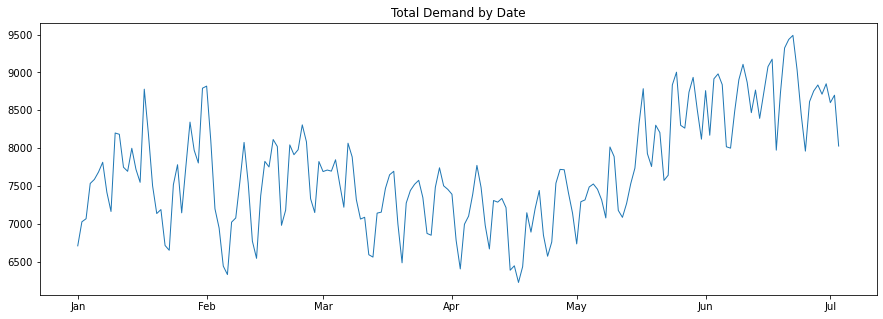

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Demand, linewidth=1)
ax.set_title("Total Demand by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show() 

#### Temperature by Date

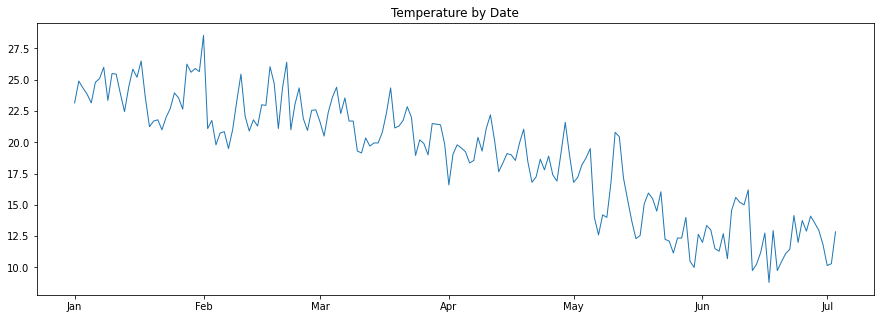

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Temp, linewidth=1)
ax.set_title("Temperature by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Rain by Date

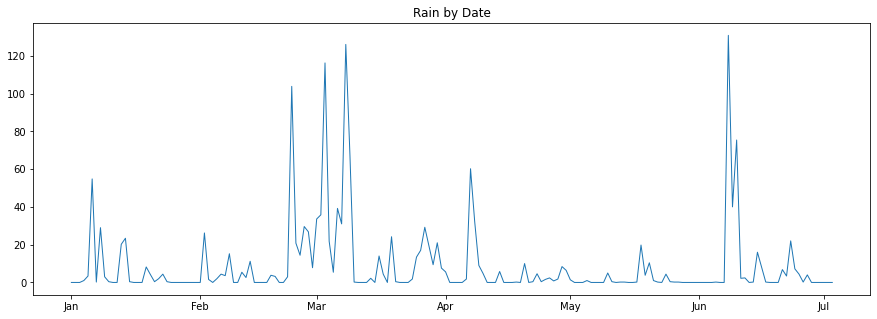

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Rain, linewidth=1)
ax.set_title("Rain by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Solar Exposure by Date

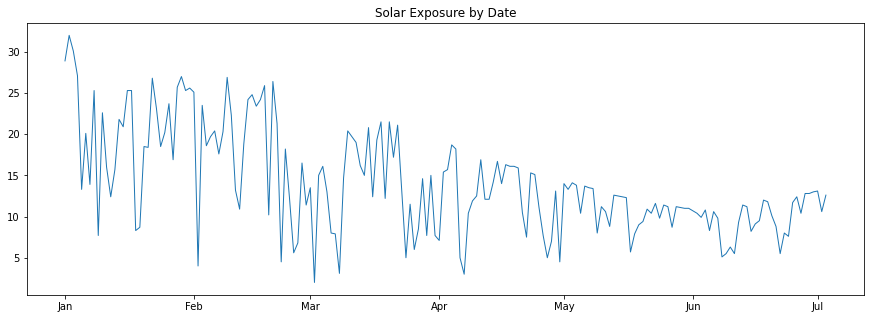

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Solar, linewidth=1)
ax.set_title("Solar Exposure by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Humidity by Date

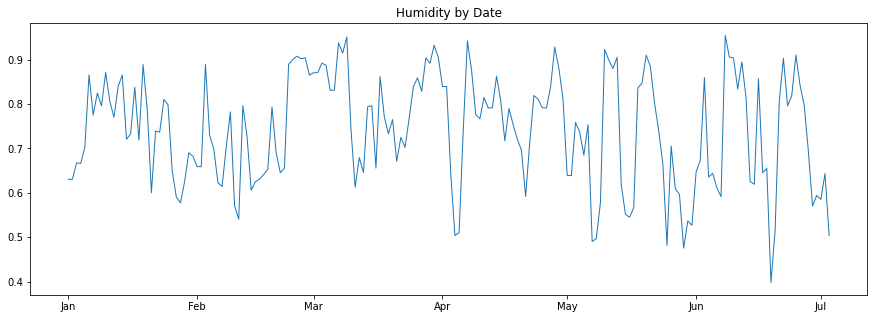

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Humidity, linewidth=1)
ax.set_title("Humidity by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Windspeed by Date

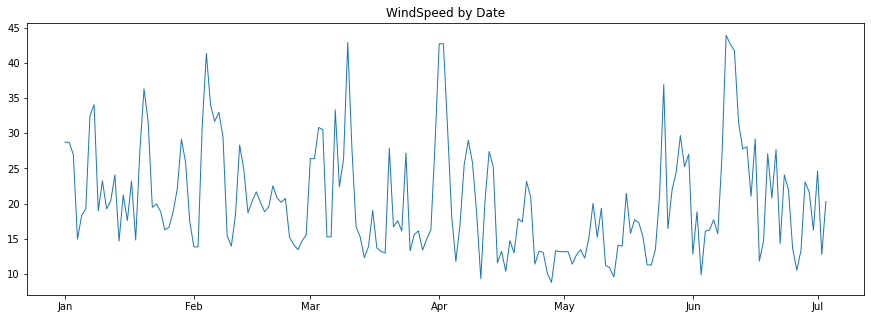

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, WindSpeed, linewidth=1)
ax.set_title("WindSpeed by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

### Correlation Analysis

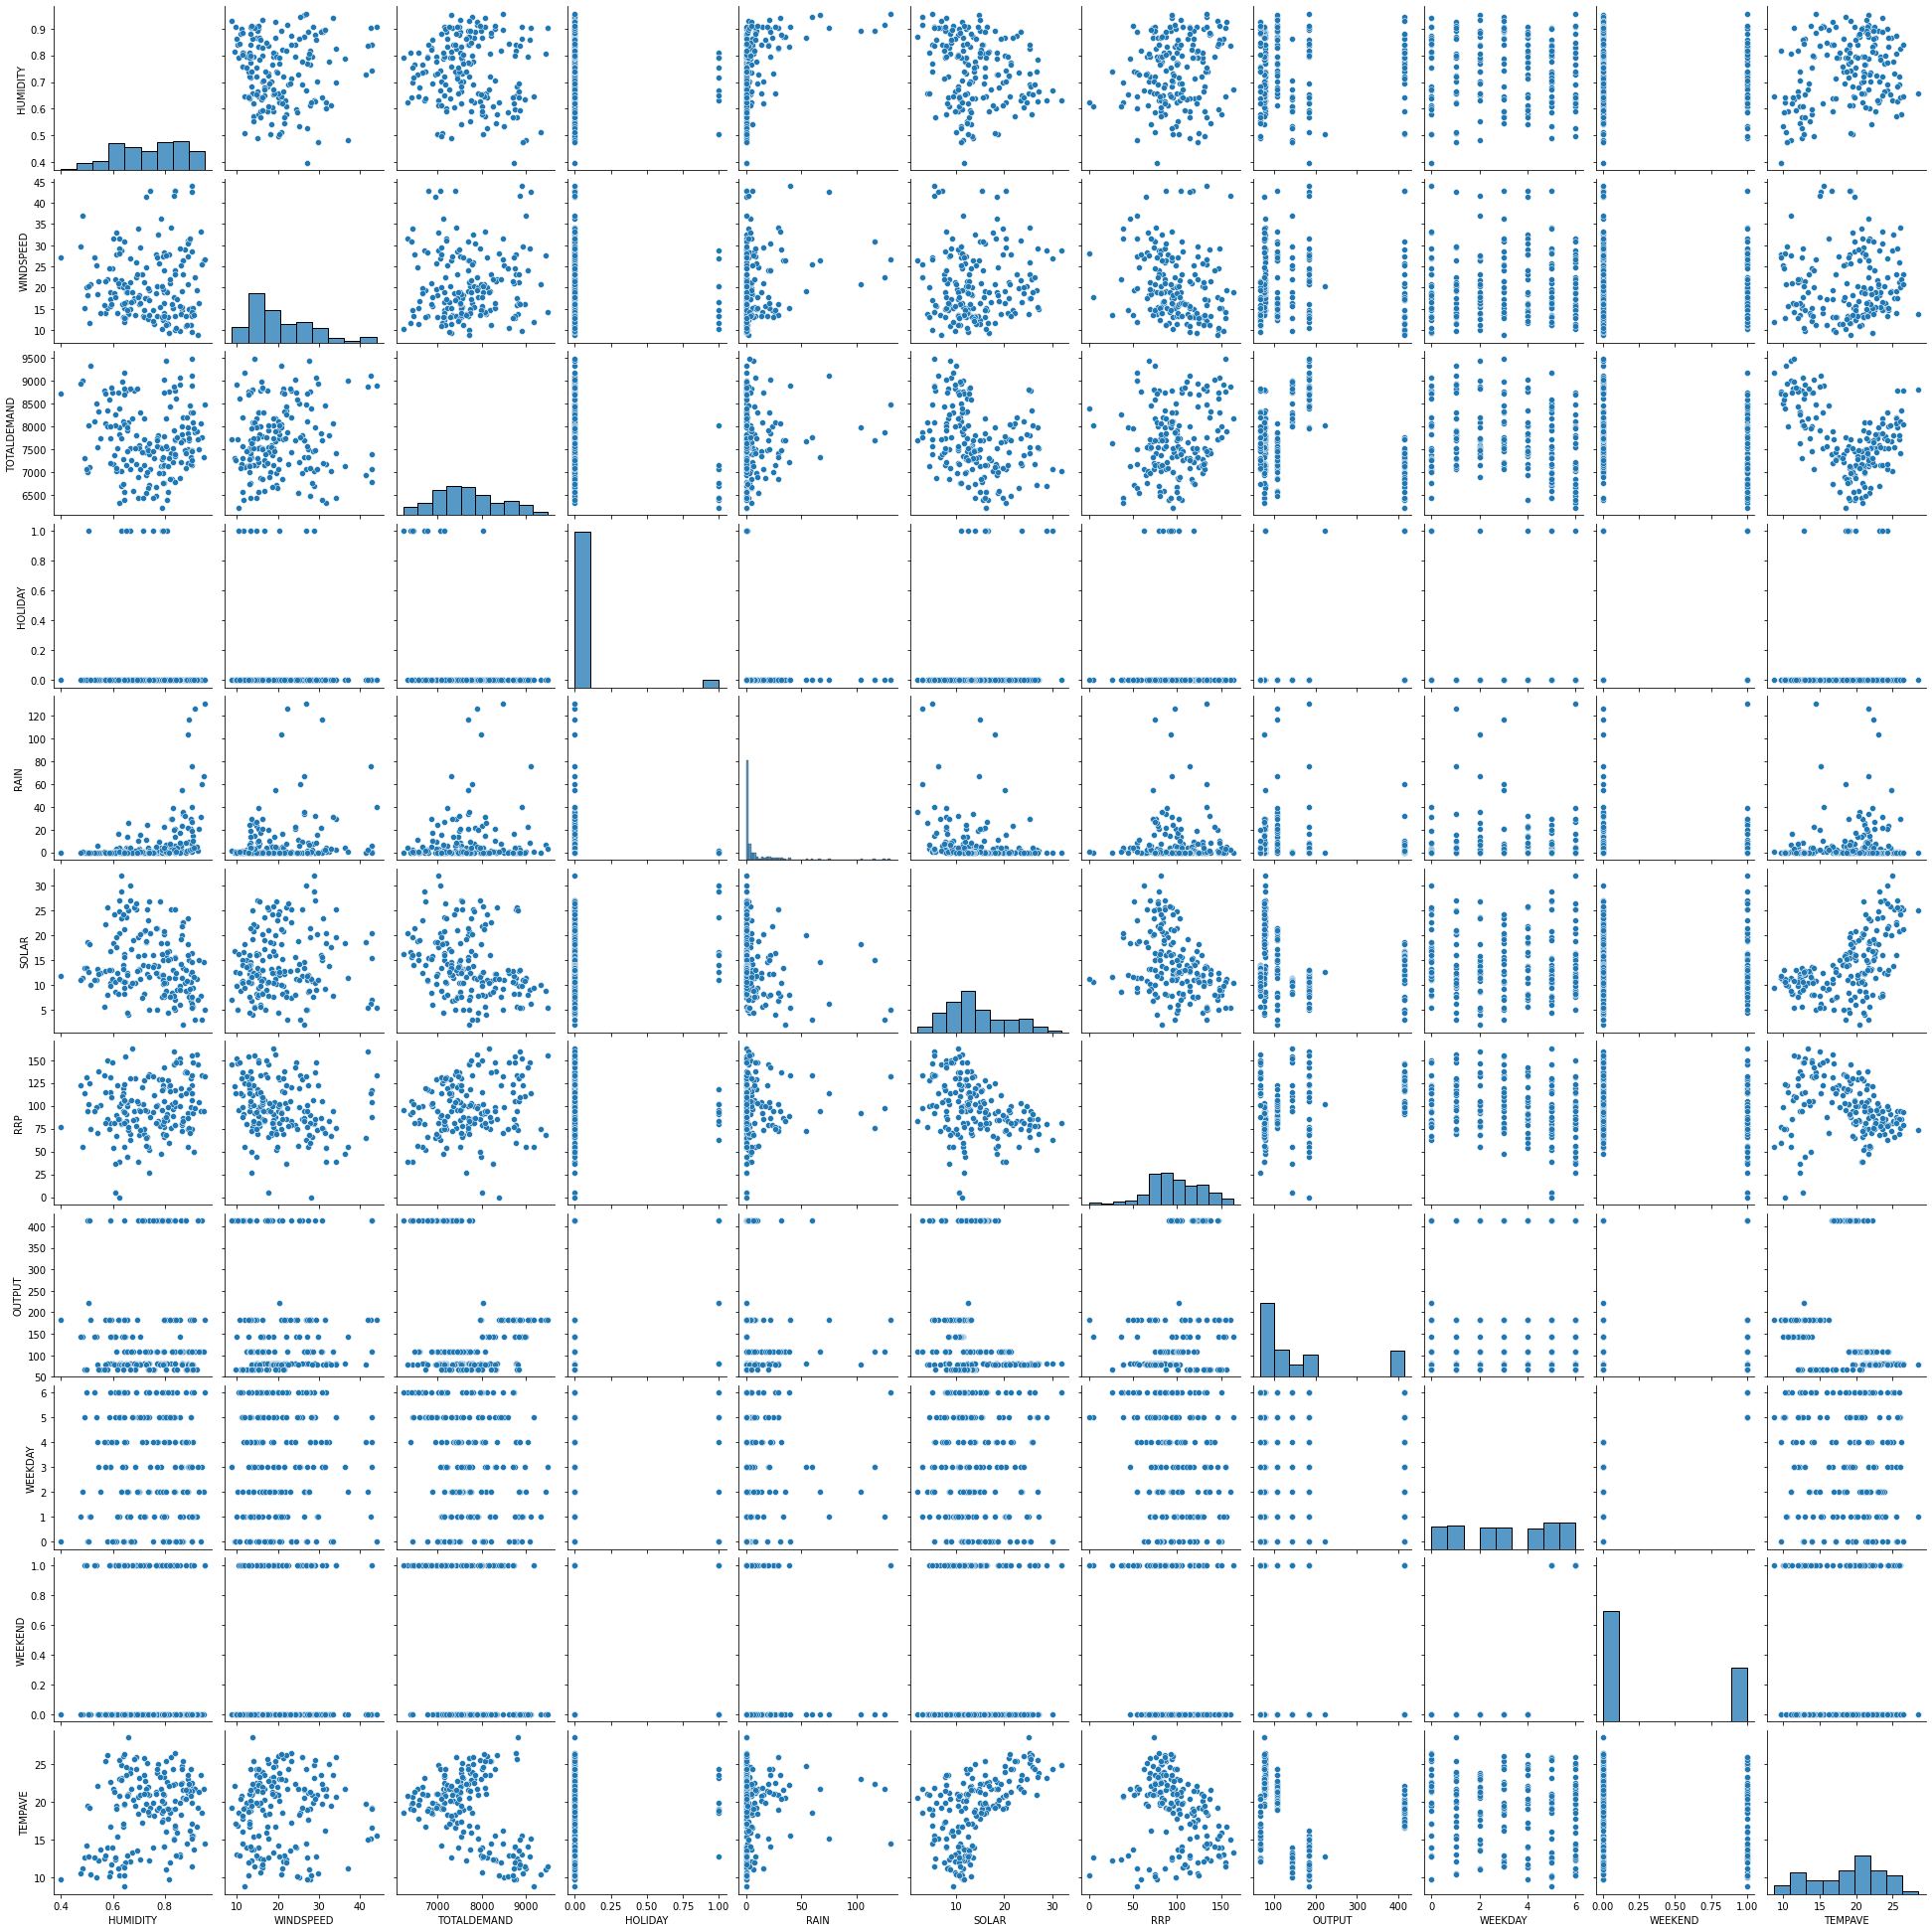

In [27]:
df_pp = df_lim[["HUMIDITY","WINDSPEED","TOTALDEMAND","HOLIDAY","RAIN","SOLAR","RRP","OUTPUT","WEEKDAY","WEEKEND","TEMPAVE"]]
sns.pairplot(df_pp) 

### Outlier Analysis

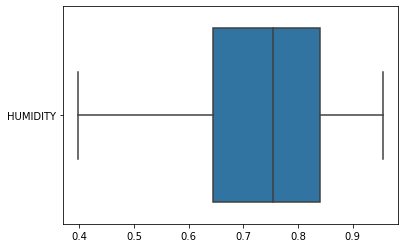

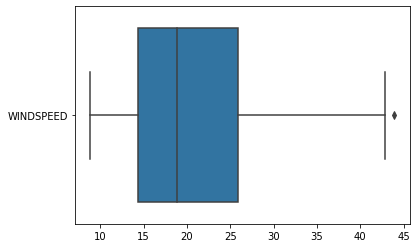

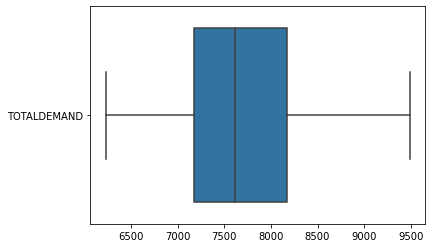

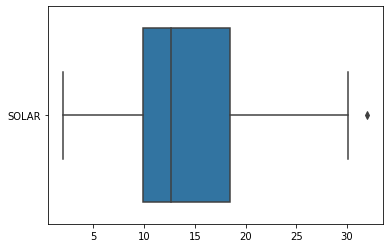

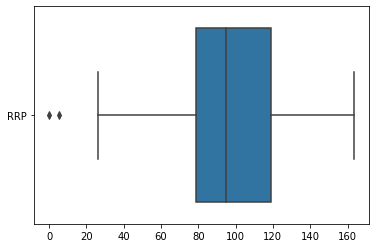

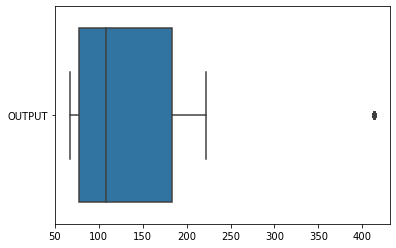

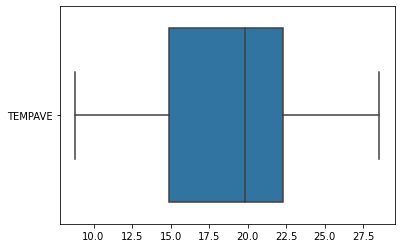

In [28]:
df_box = df_lim[["HUMIDITY","WINDSPEED","TOTALDEMAND","SOLAR","RRP","OUTPUT","TEMPAVE"]]
for col in df_box.columns:
    sns.boxplot(data=df_box[[col]], orient="h")
    plt.show()